## 80 collision hotspot locations: OSMnx'highway types classifications'

This notebook outputs OSMnx highway type stats for the 80 collision hotspots we've identified in LA. Huge thanks to Yoh for all of his help with this notebook.

*Notebook Author:* Ellie

In [25]:
import pandas as pd

In [26]:
#import csv to dataframe
df = pd.read_csv('Data/Locations_Master.csv')

In [27]:
df

,ID,point_x,point_y,match_addr
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [28]:
# add columns to df for metrics to capture later on
df['service']=0
df['residential']=0
df['footway']=0
df['primary']=0
df['secondary']=0
df['tertiary']=0

In [29]:
df

,ID,point_x,point_y,match_addr,service,residential,footway,primary,secondary,tertiary
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0


In [30]:
# rename columns
df.columns = ['ID',
              'Longitude',
              'Latitude',
              'Location',
              'service',
              'residential',
              'footway',
              'primary',
              'secondary',
              'tertiary']
df

,ID,Longitude,Latitude,Location,service,residential,footway,primary,secondary,tertiary
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0


In [31]:
import geopandas as gpd
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,ID,Longitude,Latitude,Location,service,residential,footway,primary,secondary,tertiary,geometry
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.27032 34.06666)
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.26521 33.92548)
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.33348 34.07616)
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.25608 34.01604)
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96726)
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96621)
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.36251 34.06303)
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.57142 34.17699)


## Creating a function that will loop through our 80 locations

In [32]:
# for plotting
import matplotlib.pyplot as plt

# for spatial
import geopandas as gpd

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [33]:
# create a function 
def analyze_highway_type(lat,lon):
    # call osmnx with a lat/lon pair
    G = ox.graph.graph_from_point((lat,lon),dist=400)
    
    #project to webmercator 
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # value counts for edges 'highway'
    highway = gdf_edges['highway'].value_counts()
   
    # return observations as a dictionary
    d = dict()
    d['service']=len(gdf_edges[gdf_edges['highway'] == 'service'])
    d['residential']=len(gdf_edges[gdf_edges['highway'] == 'residential']) 
    d['footway']=len(gdf_edges[gdf_edges['highway'] == 'footway'])
    d['primary']=len(gdf_edges[gdf_edges['highway'] == 'primary'])
    d['secondary']=len(gdf_edges[gdf_edges['highway'] == 'secondary'])
    d['tertiary']=len(gdf_edges[gdf_edges['highway'] == 'tertiary'])
    return d
analyze_highway_type(34.066662, -118.270324)

{'service': 155,
 'residential': 176,
 'footway': 18,
 'primary': 66,
 'secondary': 6,
 'tertiary': 0}

In [35]:
# testing the function with another random lat/lon pair
analyze_highway_type(33.966213, -118.309024)

{'service': 32,
 'residential': 82,
 'footway': 0,
 'primary': 20,
 'secondary': 0,
 'tertiary': 18}

In [36]:
# loop through the dataframe and analyze
for index, row in gdf.iterrows():
    # call the function
    new_data = analyze_highway_type(row.Latitude,row.Longitude)
    
    # add data to the column you created
    gdf.loc[index, 'service'] = new_data['service']
    gdf.loc[index, 'residential'] = new_data['residential']   
    gdf.loc[index, 'footway'] = new_data['footway']
    gdf.loc[index, 'primary'] = new_data['primary']
    gdf.loc[index, 'secondary'] = new_data['secondary']
    gdf.loc[index, 'tertiary'] = new_data['tertiary']

In [37]:
# see new data added to gdf columns
gdf

,ID,Longitude,Latitude,Location,service,residential,footway,primary,secondary,tertiary,geometry
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",155,176,18,66,6,0,POINT (-118.27032 34.06666)
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",57,58,0,0,24,14,POINT (-118.26521 33.92548)
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",4,34,0,8,0,0,POINT (-118.33348 34.07616)
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",163,180,0,40,6,28,POINT (-118.25608 34.01604)
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",120,144,0,26,0,57,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",26,70,0,16,0,14,POINT (-118.30902 33.96726)
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",32,82,0,20,0,18,POINT (-118.30902 33.96621)
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",128,82,122,44,38,42,POINT (-118.36251 34.06303)
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",38,50,52,0,42,0,POINT (-118.57142 34.17699)


In [38]:
# add total column 
gdf['Total'] = gdf['service'] + gdf['footway'] + gdf['primary'] + gdf['residential'] + gdf['secondary'] + gdf['tertiary']
gdf

,ID,Longitude,Latitude,Location,service,residential,footway,primary,secondary,tertiary,geometry,Total
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",155,176,18,66,6,0,POINT (-118.27032 34.06666),421
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",57,58,0,0,24,14,POINT (-118.26521 33.92548),153
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",4,34,0,8,0,0,POINT (-118.33348 34.07616),46
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",163,180,0,40,6,28,POINT (-118.25608 34.01604),417
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",120,144,0,26,0,57,POINT (-118.25652 33.95390),347
...,...,...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",26,70,0,16,0,14,POINT (-118.30902 33.96726),126
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",32,82,0,20,0,18,POINT (-118.30902 33.96621),152
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",128,82,122,44,38,42,POINT (-118.36251 34.06303),456
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",38,50,52,0,42,0,POINT (-118.57142 34.17699),182


In [39]:
# normalizing the data to see percentages

gdf['Percent Service'] = gdf['service']/gdf['Total']*100
gdf['Percent Residential'] = gdf['residential']/gdf['Total']*100
gdf['Percent Footway'] = gdf['footway']/gdf['Total']*100
gdf['Percent Primary'] = gdf['primary']/gdf['Total']*100
gdf['Percent Secondary'] = gdf['secondary']/gdf['Total']*100
gdf['Percent Tertiary'] = gdf['tertiary']/gdf['Total']*100
gdf

,ID,Longitude,Latitude,Location,service,residential,footway,primary,secondary,tertiary,geometry,Total,Percent Service,Percent Residential,Percent Footway,Percent Primary,Percent Secondary,Percent Tertiary
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",155,176,18,66,6,0,POINT (-118.27032 34.06666),421,36.817102,41.805226,4.275534,15.676960,1.425178,0.000000
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",57,58,0,0,24,14,POINT (-118.26521 33.92548),153,37.254902,37.908497,0.000000,0.000000,15.686275,9.150327
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",4,34,0,8,0,0,POINT (-118.33348 34.07616),46,8.695652,73.913043,0.000000,17.391304,0.000000,0.000000
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",163,180,0,40,6,28,POINT (-118.25608 34.01604),417,39.088729,43.165468,0.000000,9.592326,1.438849,6.714628
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",120,144,0,26,0,57,POINT (-118.25652 33.95390),347,34.582133,41.498559,0.000000,7.492795,0.000000,16.426513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",26,70,0,16,0,14,POINT (-118.30902 33.96726),126,20.634921,55.555556,0.000000,12.698413,0.000000,11.111111
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",32,82,0,20,0,18,POINT (-118.30902 33.96621),152,21.052632,53.947368,0.000000,13.157895,0.000000,11.842105
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",128,82,122,44,38,42,POINT (-118.36251 34.06303),456,28.070175,17.982456,26.754386,9.649123,8.333333,9.210526
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",38,50,52,0,42,0,POINT (-118.57142 34.17699),182,20.879121,27.472527,28.571429,0.000000,23.076923,0.000000


In [18]:
gdf.sum()

/tmp/ipykernel_439/692725195.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gdf.sum()


ID                                                              12320064
Longitude                                                   -9706.003811
Latitude                                                     2794.715834
Location               ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CAAVA...
service                                                             9716
footway                                                             3222
primary                                                             2297
residential                                                         7406
secondary                                                           1947
tertiary                                                            1330
Total                                                              25918
Percent Service                                              2940.541834
Percent Footway                                               786.888601
Percent Primary                                    

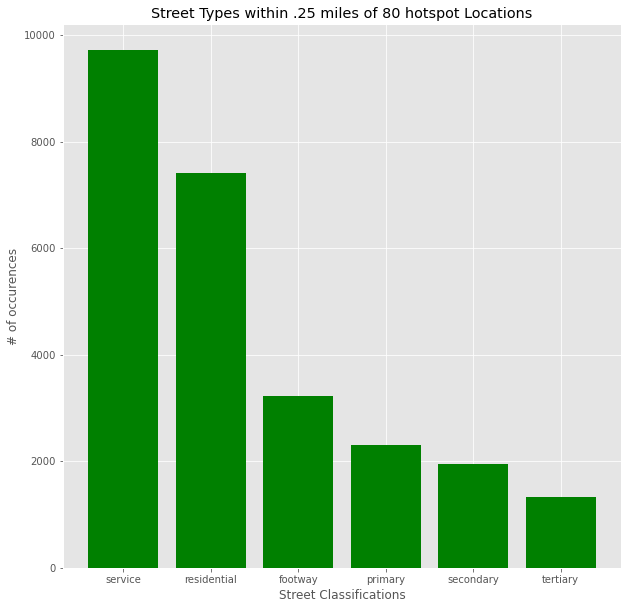

In [41]:
%matplotlib inline
plt.style.use('ggplot')
x = ['service', 'residential','footway', 'primary', 'secondary', 'tertiary']
highway = [9716, 7406, 3222, 2297, 1947, 1330]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, highway, color='green')
plt.xlabel("Street Classifications")
plt.ylabel("# of occurences")
plt.title("Street Types within .25 miles of 80 hotspot Locations")

plt.xticks(x_pos, x)

plt.show()

In [42]:
# write file to geojson
gdf.to_file("street_type.geojson", driver='GeoJSON')